In [1]:
import sys
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('..\\scripts'))

from fastai.vision.widgets import *
from helpers import *

In [2]:
data_loader = make_data_loader(get_data_dir(), batch_size=9)

arch = 18
learn = resnet_learner(data_loader, arch)

load_path = os.path.join(get_models_dir(), f"resnet{arch}_model")
learn.load(load_path)


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


D:\ENGINEERING\mezcal\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
D:\ENGINEERING\mezcal\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


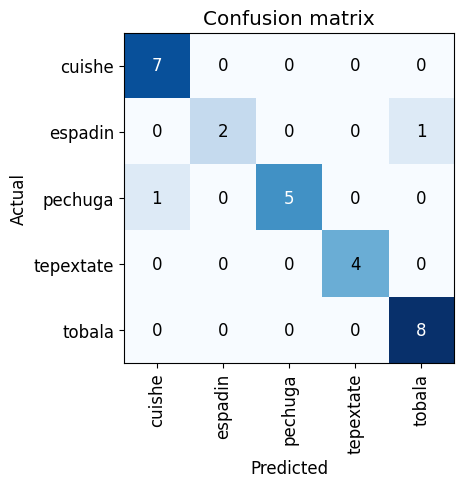

In [3]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()
#plt.savefig('plot_confusion_matrix.png', dpi=120)

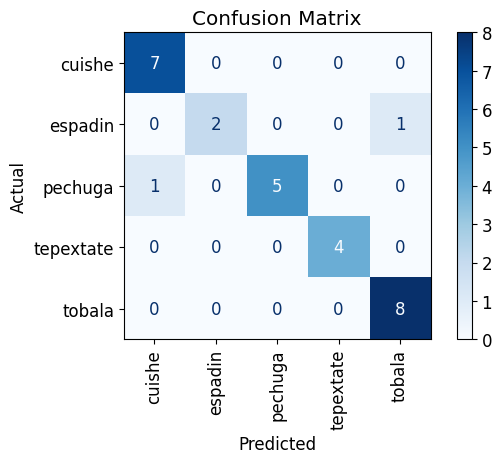

In [13]:
conf = interp.confusion_matrix()
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=data_loader.vocab)
disp.plot(cmap=plt.cm.Blues,values_format='g')

plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)

plt.imshow(conf, interpolation='nearest', cmap="Blues")

cm_png_path = os.path.join(get_root_dir(), "confusion_matrix.png")
plt.savefig(cm_png_path, dpi=120)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
results = learn.show_results()
results.savefig('results.png', dpi=120)

In [ ]:
learn.show_results()